# Average EHR Spending by City

In [17]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy import stats
import seaborn as sns

In [18]:
## Load the datasets
df_ehr_provider = pd.read_csv('EHR_Incentive_Program_Payments_Providers.csv')
df_ehr_hospital = pd.read_csv('EHR_Incentive_Program_Payments_Hospitals.csv')
df_city_revenue = pd.read_csv('City_Revenues_Per_Capita.csv')
df_city_expenditure = pd.read_csv('City_Expenditures_Per_Capita.csv')

## Analysis for EHR per Capita for Individual Healthcare Providers

In [19]:
## delete the unneeded columns on the provider dataset
df_ehr_provider.drop(df_ehr_provider.columns[0:8],axis=1,inplace = True)
df_ehr_provider.drop(df_ehr_provider.columns[1:4],axis=1,inplace = True)
df_ehr_provider.drop(df_ehr_provider.columns[3:6],axis=1,inplace = True)
df_ehr_provider.drop(['Program_Ye','Payee_NPI','Latitude','Longitude','total_rece'],axis=1,inplace = True)
df_ehr_provider.head()


,Business_C,Payment_Ye,total_paym
0,Sacramento,2019,38250.0
1,Oakland,2014,21250.0
2,Antioch,2016,21250.0
3,Loma Linda,2015,29750.0
4,Orange,2014,21250.0


In [20]:
## group the practitioner data by city and year, then sum the total payments
df_ehr_provider['Business_C'] = df_ehr_provider['Business_C'].str.lower()
df_ehr_provider = df_ehr_provider.groupby(['Business_C','Payment_Ye'])['total_paym'].sum().reset_index()
df_ehr_provider.to_csv('test_group_by_check.csv')
df_ehr_provider.head()

,Business_C,Payment_Ye,total_paym
0,adelanto,2014,14166.67
1,adelanto,2015,21250.00
2,adelanto,2016,29750.00
3,agoura hills,2014,63750.00
4,agoura hills,2016,21250.00


In [21]:
#change all Entity Names to lower case
df_city_revenue['Entity Name'] = df_city_revenue['Entity Name'].str.lower()
df_city_revenue.head()

,Entity Name,Fiscal Year,Total Revenues,Estimated Population,Revenues Per Capita
0,adelanto,2021,22556106,36569.0,617.0
1,adelanto,2020,20455012,35663.0,574.0
2,adelanto,2019,20232000,35136.0,576.0
3,adelanto,2018,18224861,35293.0,516.0
4,adelanto,2017,15171753,34273.0,443.0


In [22]:
df_city_expenditure['Entity Name'] = df_city_revenue['Entity Name'].str.lower()
df_city_expenditure.head()

,Entity Name,Fiscal Year,Total Expenditures,Estimated Population,Expenditures Per Capita
0,adelanto,2021,20580944,36569.0,563.0
1,adelanto,2020,26376314,35663.0,740.0
2,adelanto,2019,30886709,35136.0,879.0
3,adelanto,2018,20531571,35293.0,582.0
4,adelanto,2017,16035685,34273.0,468.0


In [23]:
## merge the provider dataset with the city revenue dataset
df_provider_city = df_ehr_provider.merge(df_city_revenue, how="inner",left_on=['Business_C','Payment_Ye'],right_on=['Entity Name','Fiscal Year'])
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Entity Name,Fiscal Year,Total Revenues,Estimated Population,Revenues Per Capita
0,adelanto,2014,14166.67,adelanto,2014,13047272,32511.0,401.0
1,adelanto,2015,21250.00,adelanto,2015,14051611,33084.0,425.0
2,adelanto,2016,29750.00,adelanto,2016,14565863,33497.0,435.0
3,agoura hills,2014,63750.00,agoura hills,2014,25485389,20625.0,1236.0
4,agoura hills,2016,21250.00,agoura hills,2016,28100766,21211.0,1325.0


In [24]:
## drop the duplicate columns
df_provider_city = df_provider_city.drop(['Entity Name','Fiscal Year'], axis=1)
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Total Revenues,Estimated Population,Revenues Per Capita
0,adelanto,2014,14166.67,13047272,32511.0,401.0
1,adelanto,2015,21250.00,14051611,33084.0,425.0
2,adelanto,2016,29750.00,14565863,33497.0,435.0
3,agoura hills,2014,63750.00,25485389,20625.0,1236.0
4,agoura hills,2016,21250.00,28100766,21211.0,1325.0


In [25]:
## merge with the city expenditure dataset
df_provider_city = df_provider_city.merge(df_city_expenditure, how="inner",left_on=['Business_C','Payment_Ye', 'Estimated Population'],right_on=['Entity Name','Fiscal Year', 'Estimated Population'])
df_provider_city = df_provider_city.drop(['Entity Name','Fiscal Year'], axis=1)
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita
0,adelanto,2014,14166.67,13047272,32511.0,401.0,13560072,417.0
1,adelanto,2015,21250.00,14051611,33084.0,425.0,15297952,462.0
2,adelanto,2016,29750.00,14565863,33497.0,435.0,23692799,707.0
3,agoura hills,2014,63750.00,25485389,20625.0,1236.0,23389616,1134.0
4,agoura hills,2016,21250.00,28100766,21211.0,1325.0,31218079,1472.0


In [26]:
df_provider_city.to_csv('ultimate_test.csv')

In [27]:
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita
0,adelanto,2014,14166.67,13047272,32511.0,401.0,13560072,417.0
1,adelanto,2015,21250.00,14051611,33084.0,425.0,15297952,462.0
2,adelanto,2016,29750.00,14565863,33497.0,435.0,23692799,707.0
3,agoura hills,2014,63750.00,25485389,20625.0,1236.0,23389616,1134.0
4,agoura hills,2016,21250.00,28100766,21211.0,1325.0,31218079,1472.0


In [28]:
## create the "EHR per Capita" column by divide the total_paym by the estimated population in that year
df_provider_city['EHR Per Capita'] = df_provider_city['total_paym']/df_provider_city['Estimated Population']
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita,EHR Per Capita
0,adelanto,2014,14166.67,13047272,32511.0,401.0,13560072,417.0,0.435750
1,adelanto,2015,21250.00,14051611,33084.0,425.0,15297952,462.0,0.642304
2,adelanto,2016,29750.00,14565863,33497.0,435.0,23692799,707.0,0.888139
3,agoura hills,2014,63750.00,25485389,20625.0,1236.0,23389616,1134.0,3.090909
4,agoura hills,2016,21250.00,28100766,21211.0,1325.0,31218079,1472.0,1.001839


In [32]:
## Get the last entry for each city as the total payment they have received
df_provider_city_last = df_provider_city['Payment_Ye']==df_provider_city.groupby(['Business_C'])['Payment_Ye'].last()
df_provider_city_last.head()

ValueError: Can only compare identically-labeled Series objects

### Plot the preliminary histograms

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([1.00000000e+02, 1.22129400e+02, 1.44258800e+02, ...,
        1.10702741e+05, 1.10724871e+05, 1.10747000e+05]),
 <BarContainer object of 5000 artists>)

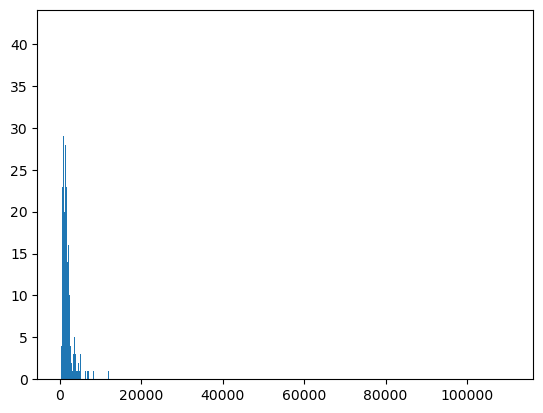

In [14]:
## plot the histogram for revenue per capita
plt.hist(df_provider_city_last['Revenues Per Capita'], bins=5000)

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([   95.    ,   112.5028,   130.0056, ..., 87573.9944, 87591.4972,
        87609.    ]),
 <BarContainer object of 5000 artists>)

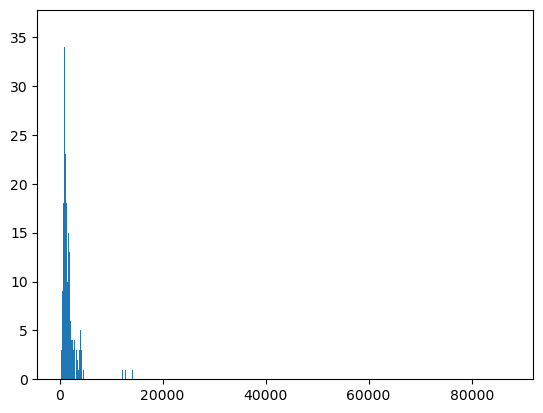

In [15]:
## plot the histogram for expenditure per capita
plt.hist(df_provider_city_last['Expenditures Per Capita'], bins=5000)

(array([ 7., 12., 19., ...,  0.,  0.,  1.]),
 array([9.66234097e-02, 1.37530011e-01, 1.78436612e-01, ...,
        2.04547816e+02, 2.04588723e+02, 2.04629630e+02]),
 <BarContainer object of 5000 artists>)

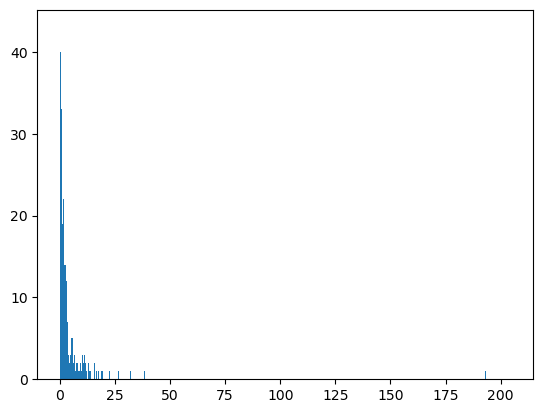

In [16]:
## plot the histogram for EHR per Capita
plt.hist(df_provider_city_last['EHR Per Capita'], bins=5000)

## Regression Analysis